Plot of surface salinity with quivers for Eart Matters.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools, teos_tools

%matplotlib inline

In [2]:
grid_T = nc.Dataset('/results/SalishSea/nowcast/03apr16/SalishSea_1h_20160403_20160403_grid_T.nc')
grid_U = nc.Dataset('/results/SalishSea/nowcast/03apr16/SalishSea_1h_20160403_20160403_grid_U.nc')
grid_V = nc.Dataset('/results/SalishSea/nowcast/03apr16/SalishSea_1h_20160403_20160403_grid_V.nc')

In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

In [4]:
t=0

sal = grid_T.variables['vosaline'][t,0,:,:]
U = grid_U.variables['vozocrtx'][t,0,:,:]
V = grid_V.variables['vomecrty'][t,0,:,:]
tmask = mesh_mask.variables['tmask'][0,0,:,:]
umask = mesh_mask.variables['umask'][0,0,:,:]
vmask = mesh_mask.variables['vmask'][0,0,:,:]

sal_m = np.ma.array(sal, mask = 1-tmask)[1:,1:]
U_m = np.ma.array(U, mask = 1-umask)
V_m = np.ma.array(V, mask = 1-vmask)

In [5]:
lons = grid_T.variables['nav_lon'][1:,1:]
lats = grid_T.variables['nav_lat'][1:,1:]

In [6]:
U_us, V_us = viz_tools.unstagger(U_m, V_m)
theta = 29
theta_rad = theta * np.pi / 180

u_E = U_us * np.cos(theta_rad) - V_us * np.sin(theta_rad)
v_N = U_us * np.sin(theta_rad) + V_us * np.cos(theta_rad)



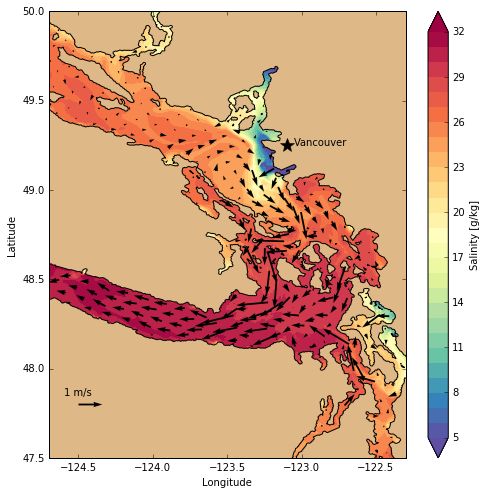

In [7]:
fig,ax= plt.subplots(1,1,figsize=(8,8))
clevels = np.arange(5,33,1)
mesh = ax.contourf(lons, lats, teos_tools.psu_teos(sal_m), clevels, cmap = 'Spectral_r', extend='both')
viz_tools.plot_coastline(ax, grid_B,coords='map')
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity [g/kg]')
ax.set_axis_bgcolor('burlywood')
st=15
q = ax.quiver(lons[::st,::st], lats[::st,::st],
              u_E[::st,::st], v_N[::st,::st], scale=15,color='k', pivot='middle',width=0.005)
ax.quiverkey(q, -124.5, 47.8, 1, '1 m/s', coordinates='data',
                  color='k', labelcolor='black')
ax.plot(-123.1,49.25, 'k*',ms=15)
ax.text(-123.05, 49.25, 'Vancouver')

ax.set_ylim([47.5,50])
ax.set_xlim([-124.7,-122.3])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [8]:
fig.savefig('SalishSeaModel_03apr2016_ebbtide.png', dpi=300, bbox_inches='tight')